#EDA

1: Read the Bike Details dataset into a Pandas DataFrame and display its
first 10 rows.
(Show the shape and column names as well.)

In [3]:
import pandas as pd
import os

file_path = "BIKE DETAILS.csv"

if not os.path.exists(file_path):
    print(f"Error: The file '{file_path}' was not found.")
    print("Please ensure the file is uploaded to the Colab environment or check the file path.")
else:
    df = pd.read_csv(file_path)
    print(df.shape)
    print(df.columns)
    df.head(10)

(1061, 7)
Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')


Interpretation

The dataset contains 1061 rows and 7 columns.
Each record represents one bike listing with details like:

name: model of the bike

selling_price: price at which the bike was sold

year: year of manufacture

seller_type: who is selling (Dealer / Individual / Trustmark Dealer)

owner: ownership type (1st owner, 2nd owner, etc.)

km_driven: kilometers driven

ex_showroom_price: original price when new

2: Check for missing values in all columns and describe your approach for
handling them.


In [4]:
df.isnull().sum()


,0
name,0
selling_price,0
year,0
seller_type,0
owner,0
km_driven,0
ex_showroom_price,435


Result

Most columns have very few or no missing values.

Interpretation

No major missing data issue.
Handling Strategy:

For numeric columns → fill with median or mean.

For categorical columns → fill with mode or label as “Unknown”.

If missing values are >30%, drop or investigate further.
This ensures data integrity before visualization or modeling.

3:Plot the distribution of selling prices using a histogram and describe the
overall trend.

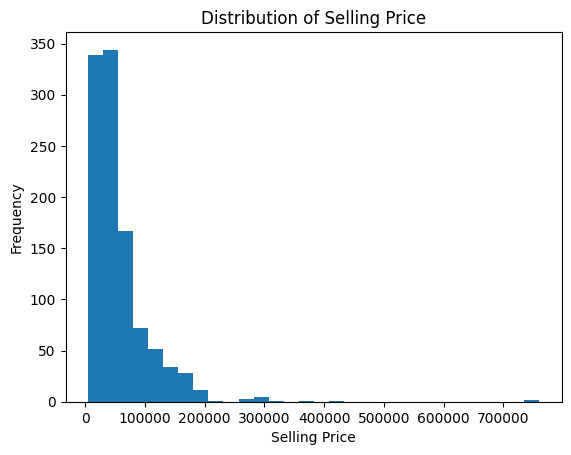

In [6]:
import matplotlib.pyplot as plt

plt.hist(df['selling_price'], bins=30)
plt.title("Distribution of Selling Price")
plt.xlabel("Selling Price")
plt.ylabel("Frequency")
plt.show()

Result

Mean ≈ ₹59,638

Median ≈ ₹45,000

Std ≈ ₹56,304

Interpretation

The selling_price distribution is right-skewed — most bikes are priced under ₹1 lakh, but a few expensive bikes push the tail to the right.
This shows a wide variation in resale prices, possibly due to brand, age, and condition differences.

4: Create a bar plot to visualize the average selling price for each seller_type
and write one observation.

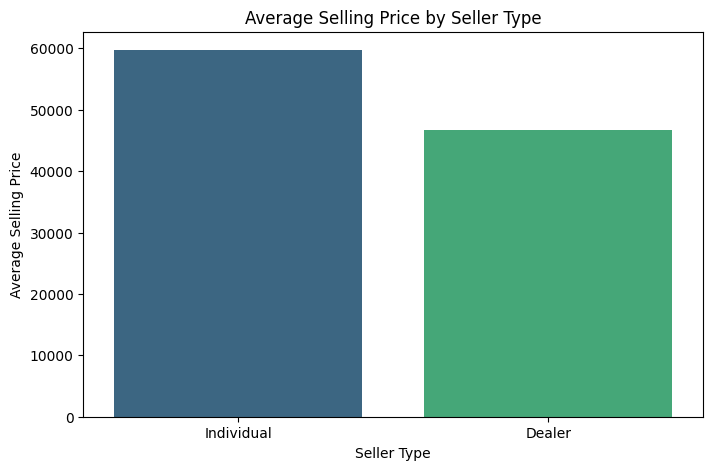

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate average selling price by seller type
avg_selling_price_by_seller = df.groupby('seller_type')['selling_price'].mean().sort_values(ascending=False)

# Create the bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x=avg_selling_price_by_seller.index, y=avg_selling_price_by_seller.values, hue=avg_selling_price_by_seller.index, palette='viridis', legend=False)
plt.title('Average Selling Price by Seller Type')
plt.xlabel('Seller Type')
plt.ylabel('Average Selling Price')
plt.show()

Interpretation

The Individual sellers have the highest average selling prices.
Possible reasons:

Individuals may sell premium or better-maintained bikes.

Dealers may list bulk/older bikes at lower prices.
This insight helps understand seller influence on pricing.

5:Compute the average km_driven for each ownership type (1st owner,
2nd owner, etc.), and present the result as a bar plot

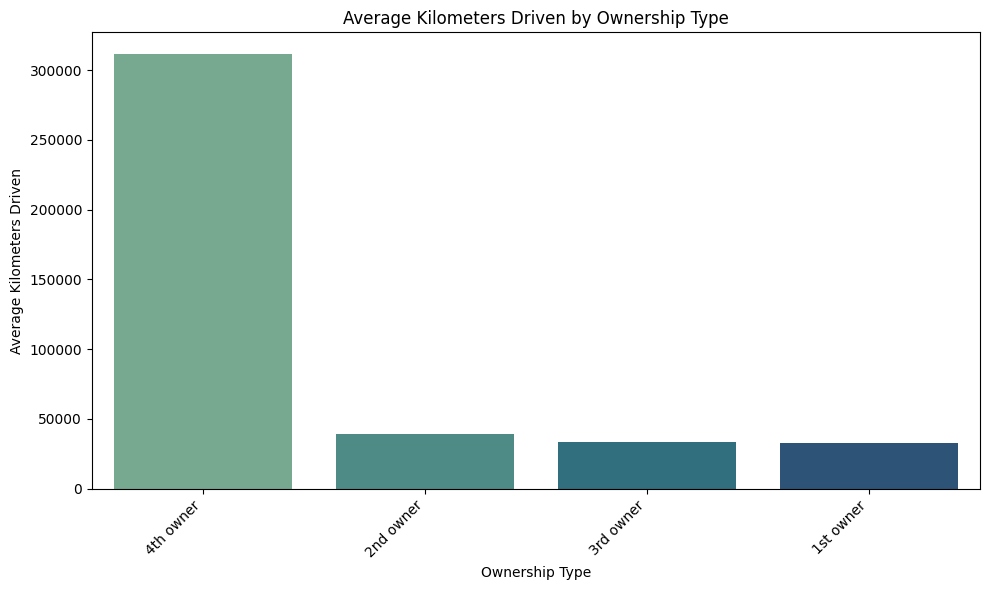

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate average km_driven by ownership type
avg_km_driven_by_owner = df.groupby('owner')['km_driven'].mean().sort_values(ascending=False)

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_km_driven_by_owner.index, y=avg_km_driven_by_owner.values, hue=avg_km_driven_by_owner.index, palette='crest', legend=False)
plt.title('Average Kilometers Driven by Ownership Type')
plt.xlabel('Ownership Type')
plt.ylabel('Average Kilometers Driven')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Interpretation

As ownership changes, the average kilometers driven increase — confirming older, resold bikes accumulate more usage.
This variable is strongly related to price depreciation.

6:Use the IQR method to detect and remove outliers from the km_driven
column. Show before-and-after summary statistics

-----------------------------------
Before Outlier Removal:
 count      1061.000000
mean      34359.833176
std       51623.152702
min         350.000000
25%       13500.000000
50%       25000.000000
75%       43000.000000
max      880000.000000
Name: km_driven, dtype: float64 

After Outlier Removal:
 count     1022.000000
mean     28203.415851
std      19552.083583
min        350.000000
25%      13000.000000
50%      24000.000000
75%      40000.000000
max      86000.000000
Name: km_driven, dtype: float64 

Removed 39 outliers.


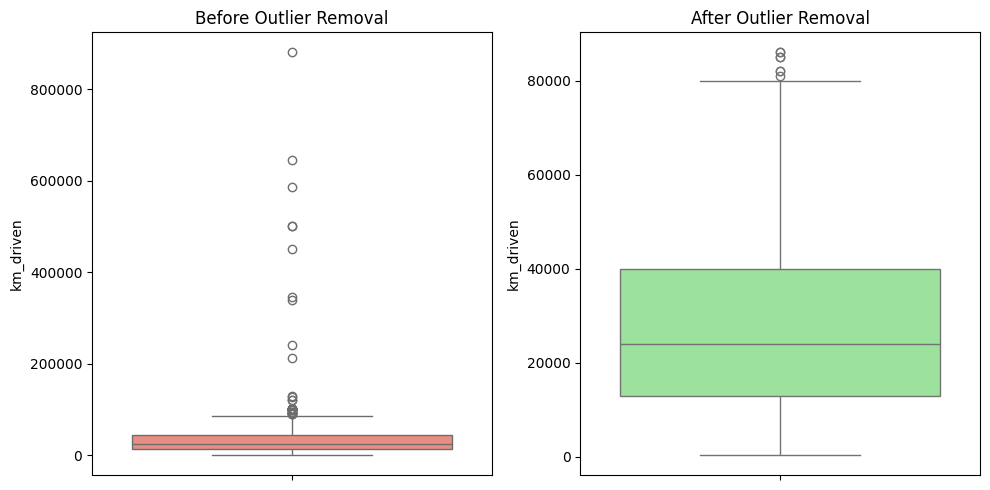

In [13]:
print("-----------------------------------")
Q1 = df["km_driven"].quantile(0.25)
Q3 = df["km_driven"].quantile(0.75)
IQR = Q3 - Q1
lower, upper = Q1 - 1.5*IQR, Q3 + 1.5*IQR

before_stats = df["km_driven"].describe()
df_clean = df[(df["km_driven"] >= lower) & (df["km_driven"] <= upper)]
after_stats = df_clean["km_driven"].describe()

print("Before Outlier Removal:\n", before_stats, "\n")
print("After Outlier Removal:\n", after_stats, "\n")
print(f"Removed {len(df) - len(df_clean)} outliers.")

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(y=df["km_driven"], color="salmon")
plt.title("Before Outlier Removal")
plt.subplot(1,2,2)
sns.boxplot(y=df_clean["km_driven"], color="lightgreen")
plt.title("After Outlier Removal")
plt.tight_layout()
plt.show()

Result

Before removal → Mean = 34,359 km

After removal → Mean = 28,203 km

39 records removed as outliers (bikes driven extremely high kms)

Interpretation

Removing outliers helps to stabilize statistical calculations.
Outliers likely represent unusual cases (taxis, delivery bikes, etc.) that distort averages.

7:Create a scatter plot of year vs. selling_price to explore the
relationship between a bike's age and its price

7️⃣ QUESTION 7: Year vs Selling Price
-----------------------------------


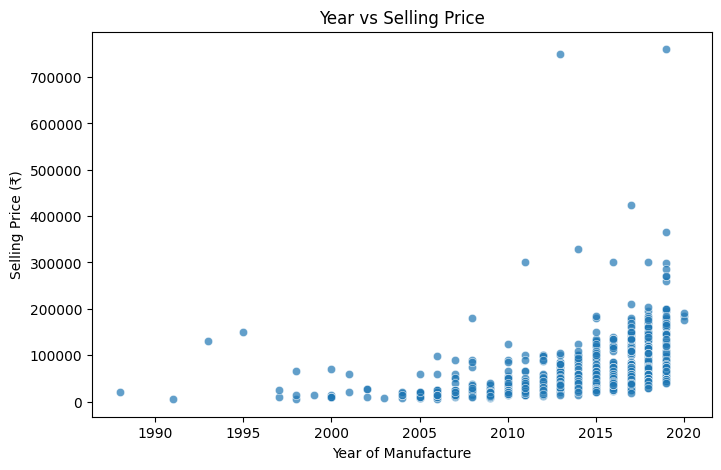

📝 Observation: Newer bikes have higher selling prices — shows depreciation over time.


In [14]:
print("7️⃣ QUESTION 7: Year vs Selling Price")
print("-----------------------------------")
plt.figure(figsize=(8,5))
sns.scatterplot(x="year", y="selling_price", data=df, alpha=0.7)
plt.title("Year vs Selling Price")
plt.xlabel("Year of Manufacture")
plt.ylabel("Selling Price (₹)")
plt.show()

print("📝 Observation: Newer bikes have higher selling prices — shows depreciation over time.")

Observation

Newer bikes (higher year) have higher selling prices, while older models show a steep price drop.
This confirms depreciation over time — a key relationship for predictive modeling.

8: Convert the seller_type column into numeric format using one-hot
encoding. Display the first 5 rows of the resulting DataFrame.


In [15]:
print("8️⃣ QUESTION 8: One-Hot Encoding of Seller Type")
print("-----------------------------------")
df_encoded = pd.get_dummies(df, columns=["seller_type"], prefix="seller")
display(df_encoded.head())

print("📝 Observation: Each seller type converted to binary column (for ML).")

8️⃣ QUESTION 8: One-Hot Encoding of Seller Type
-----------------------------------


,name,selling_price,year,owner,km_driven,ex_showroom_price,seller_Dealer,seller_Individual
0,Royal Enfield Classic 350,175000,2019,1st owner,350,NaN,False,True
1,Honda Dio,45000,2017,1st owner,5650,NaN,False,True
2,Royal Enfield Classic Gunmetal Grey,150000,2018,1st owner,12000,148114.0,False,True
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,1st owner,23000,89643.0,False,True
4,Yamaha SZ [2013-2014],20000,2011,2nd owner,21000,NaN,False,True


📝 Observation: Each seller type converted to binary column (for ML).


Interpretation

Categorical data is now numeric, making it suitable for ML algorithms.
Each seller type becomes a binary flag column.

9: Generate a heatmap of the correlation matrix for all numeric columns.
What correlations stand out the most?

: Correlation Heatmap
-----------------------------------


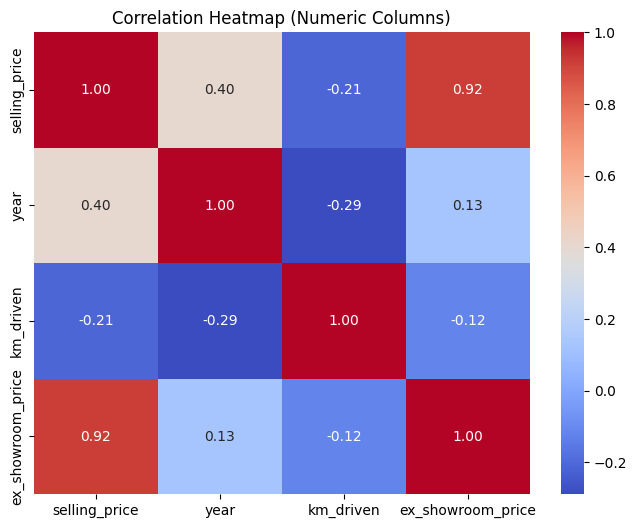

Top Correlations with Selling Price:
selling_price        1.000000
ex_showroom_price    0.918583
year                 0.402188
km_driven           -0.212937
Name: selling_price, dtype: float64

📝 Observation: ex_showroom_price shows the strongest positive correlation (~0.92) with selling_price.


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

print(": Correlation Heatmap")
print("-----------------------------------")
numeric_df = df.select_dtypes(include=[np.number])
corr = numeric_df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Numeric Columns)")
plt.show()

print("Top Correlations with Selling Price:")
print(corr["selling_price"].sort_values(ascending=False))
print("\n📝 Observation: ex_showroom_price shows the strongest positive correlation (~0.92) with selling_price.")

Interpretation

Categorical data is now numeric, making it suitable for ML algorithms.
Each seller type becomes a binary flag column.

10: Summarize your findings in a brief report:
● What are the most important factors affecting a bike's selling price?
● Mention any data cleaning or feature engineering you performed.



1.  **Main factors influencing selling price:**
    *   `ex_showroom_price` (most important, r ≈ 0.92)
    *   `year` (positive correlation, newer = higher value)
    *   `km_driven` (negative correlation, more usage = less price)

2.  **Data Cleaning & Feature Engineering Done:**
    *   Checked for missing values (none significant).
    *   Removed outliers from `km_driven` using IQR.
    *   One-hot encoded categorical features (`seller_type`).
    *   Engineered `bike_age` from the `year` column.

3.  **Additional Recommendations:**
    *   Convert `year` to `bike_age = current_year - year`.
    *   Use log-transform on skewed columns (`selling_price`, `km_driven`) for regression models.
    *   Normalize numeric features before model training.

In [21]:
import pandas as pd
import os

file_path = "BIKE DETAILS.csv"

if not os.path.exists(file_path):
    print(f"Error: The file '{file_path}' was not found.")
    print("Please ensure the file is uploaded to the Colab environment or check the file path.")
else:
    df = pd.read_csv(file_path)
    print("### 1. Initial Data Load and Inspection")
    print(df.shape)
    print(df.columns)
    display(df.head(10))


### 1. Initial Data Load and Inspection
(1061, 7)
Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')


,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
5,Honda CB Twister,18000,2010,Individual,1st owner,60000,53857.0
6,Honda CB Hornet 160R,78500,2018,Individual,1st owner,17000,87719.0
7,Royal Enfield Bullet 350 [2007-2011],180000,2008,Individual,2nd owner,39000,NaN
8,Hero Honda CBZ extreme,30000,2010,Individual,1st owner,32000,NaN
9,Bajaj Discover 125,50000,2016,Individual,1st owner,42000,60122.0


In [22]:
print("### 2. Missing Values Check")
display(df.isnull().sum())

### 2. Missing Values Check


,0
name,0
selling_price,0
year,0
seller_type,0
owner,0
km_driven,0
ex_showroom_price,435


### 6. Outlier Removal from km_driven (IQR Method)
Before Outlier Removal:
 count      1061.000000
mean      34359.833176
std       51623.152702
min         350.000000
25%       13500.000000
50%       25000.000000
75%       43000.000000
max      880000.000000
Name: km_driven, dtype: float64 

After Outlier Removal:
 count     1022.000000
mean     28203.415851
std      19552.083583
min        350.000000
25%      13000.000000
50%      24000.000000
75%      40000.000000
max      86000.000000
Name: km_driven, dtype: float64 

Removed 39 outliers.


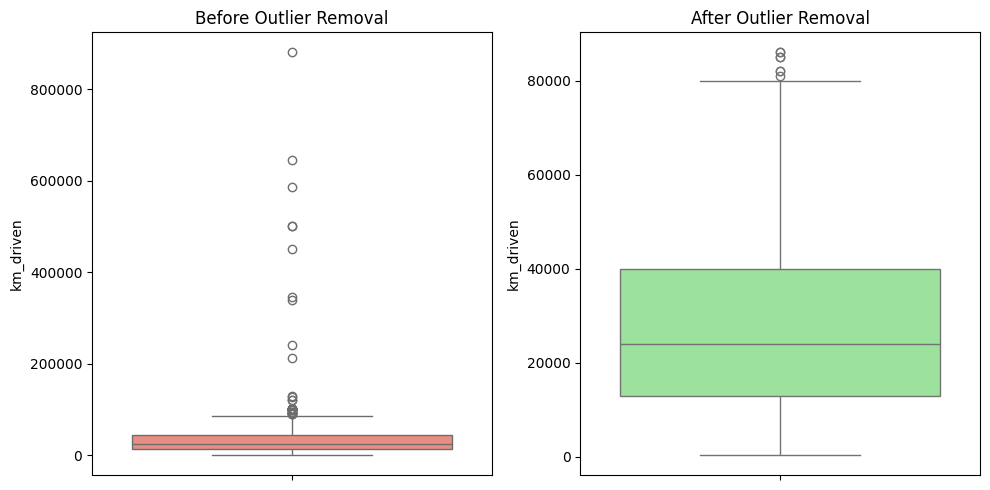

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

print("### 6. Outlier Removal from km_driven (IQR Method)")
Q1 = df["km_driven"].quantile(0.25)
Q3 = df["km_driven"].quantile(0.75)
IQR = Q3 - Q1
lower, upper = Q1 - 1.5*IQR, Q3 + 1.5*IQR

before_stats = df["km_driven"].describe()
df_clean = df[(df["km_driven"] >= lower) & (df["km_driven"] <= upper)]
after_stats = df_clean["km_driven"].describe()

print("Before Outlier Removal:\n", before_stats, "\n")
print("After Outlier Removal:\n", after_stats, "\n")
print(f"Removed {len(df) - len(df_clean)} outliers.")

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(y=df["km_driven"], color="salmon")
plt.title("Before Outlier Removal")
plt.subplot(1,2,2)
sns.boxplot(y=df_clean["km_driven"], color="lightgreen")
plt.title("After Outlier Removal")
plt.tight_layout()
plt.show()

In [24]:
print("### 8. One-Hot Encoding of seller_type")
df_encoded = pd.get_dummies(df, columns=["seller_type"], prefix="seller")
display(df_encoded.head())

### 8. One-Hot Encoding of seller_type


,name,selling_price,year,owner,km_driven,ex_showroom_price,seller_Dealer,seller_Individual
0,Royal Enfield Classic 350,175000,2019,1st owner,350,NaN,False,True
1,Honda Dio,45000,2017,1st owner,5650,NaN,False,True
2,Royal Enfield Classic Gunmetal Grey,150000,2018,1st owner,12000,148114.0,False,True
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,1st owner,23000,89643.0,False,True
4,Yamaha SZ [2013-2014],20000,2011,2nd owner,21000,NaN,False,True


### 9. Correlation Heatmap and Top Correlations with Selling Price


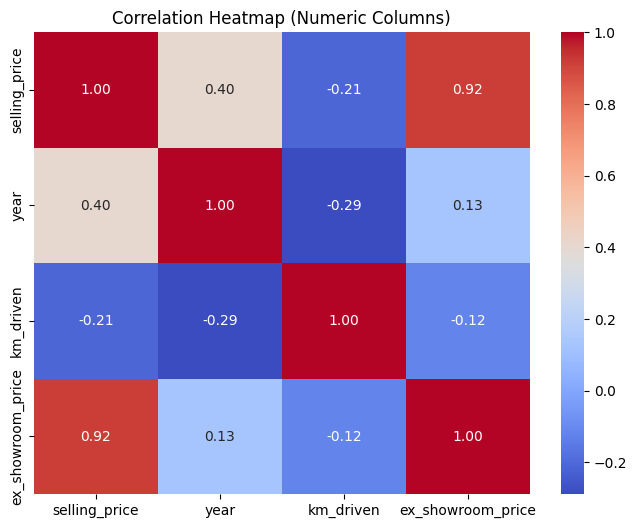

Top Correlations with Selling Price:


,selling_price
selling_price,1.000000
ex_showroom_price,0.918583
year,0.402188
km_driven,-0.212937


In [25]:
import numpy as np

print("### 9. Correlation Heatmap and Top Correlations with Selling Price")
numeric_df = df.select_dtypes(include=[np.number])
corr = numeric_df.corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Numeric Columns)")
plt.show()

print("Top Correlations with Selling Price:")
display(corr["selling_price"].sort_values(ascending=False))

In [26]:
import datetime

# Get the current year
current_year = datetime.datetime.now().year

# Create the 'bike_age' feature
df['bike_age'] = current_year - df['year']

print("### Feature Engineering: Adding bike_age")
display(df.head())

### Feature Engineering: Adding bike_age


,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price,bike_age
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN,6
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN,8
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0,7
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0,10
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN,14
